https://spark.apache.org/docs/latest/api/python/pyspark.html?highlight=foreach#pyspark.RDD

In [1]:
#configuration for pyspark for jupyter.
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"

#In below two lines, use /usr/bin/python2.7 if you want to use Python 2

os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")


from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("appName")
sc = SparkContext(conf=conf)

# sample(withReplacement, fraction, seed=None)

In [2]:
#sample(withReplacement,fractions,[seed])

rdd = sc.parallelize(range(1,100,2))
rdd.sample(False,0.1).collect()

[17, 35, 45, 61, 63, 73, 85, 87]

In [3]:
#sample with repetation.
rdd.sample(True,0.1).collect()

[7, 13, 27, 43, 97]

# mapPartitions(f, preservesPartitioning=False)

In [21]:
#create rdd with 3 partitions
prdd = sc.parallelize(range(1,51),3)

In [22]:
def func(iterator):
    for x in iterator:
        print(x)

In [23]:
def adder(iterator): 
    yield sum(iterator)

In [24]:
prdd.getNumPartitions()

3

In [25]:
prdd.foreachPartition(func) # execute in terminal mode

In [26]:
prdd.mapPartitions(adder).collect()

[136, 425, 714]

#  sortBy(keyfunc, ascending=True, numPartitions=None)

In [2]:
tmp = [('a', 1), ('b', 2), ('d', 4),('1', 3), ('2', 5)]
rddsort = sc.parallelize(tmp)

In [3]:
rddsort.sortBy(lambda x : x[0]).collect()

[('1', 3), ('2', 5), ('a', 1), ('b', 2), ('d', 4)]

In [4]:
rddsort.sortBy(lambda x : x[1]).collect()

[('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]

# distinct(numPartitions=None)

In [5]:
rdddistinct = sc.parallelize([1,1,2,2,4,5,6,6,6,6,7,8])

In [7]:
rdddistinct.distinct().collect()

[1, 2, 4, 5, 6, 7, 8]

# union(rdds)

In [8]:
rdd1 = sc.parallelize(["hello","mylife","world"])

In [9]:
rdd2 = sc.parallelize(["hello","take","challenge"])

In [12]:
rddunion = rdd1.union(rdd2)

In [13]:
rddunion.collect()

['hello', 'mylife', 'world', 'hello', 'take', 'challenge']

# subtract(other, numPartitions=None)

In [3]:
x = sc.parallelize([("a", 1), ("b", 4), ("b", 5), ("a", 3)])
y = sc.parallelize(([("a", 3), ("c", None)]))

In [4]:
x.subtract(y).collect()

[('b', 5), ('b', 4), ('a', 1)]

In [6]:
sorted(x.subtract(y).collect())

[('a', 1), ('b', 4), ('b', 5)]

# subtractByKey(other, numPartitions=None)

In [9]:
x = sc.parallelize([("a", 1), ("b", 5), ("b", 4), ("a", 3)])
y = sc.parallelize(([("a", 3), ("c", None)]))

In [10]:
x.subtractByKey(y).collect()

[('b', 5), ('b', 4)]

In [11]:
sorted(x.subtractByKey(y).collect())

[('b', 4), ('b', 5)]

# intersection(other)

In [14]:
rdd1 = sc.parallelize([1, 10, 2, 3,3, 4, 5])
rdd2 = sc.parallelize([1, 6, 2, 3, 7, 8])

In [15]:
rdd1.intersection(rdd2).collect()

[1, 2, 3]

# cartesian(other)

In [29]:
rddc = sc.parallelize([1, 2])

In [30]:
rddc.cartesian(rddc).collect()

[(1, 1), (1, 2), (2, 1), (2, 2)]

In [31]:
rddc1 = sc.parallelize([2,3])

In [32]:
rddc.cartesian(rddc1).collect()

[(1, 2), (1, 3), (2, 2), (2, 3)]

# fold(zeroValue, op)

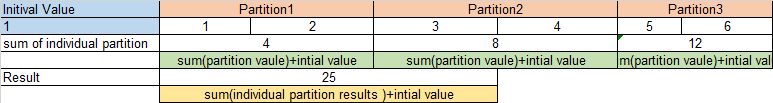

In [86]:
from operator import add

In [87]:
x = sc.parallelize([1, 2, 3, 4, 5,6],3)

In [88]:
x.fold(1,add)

25

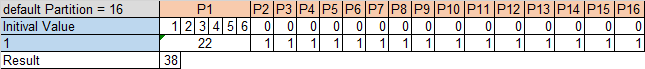

In [89]:
y = sc.parallelize([1, 2, 3, 4, 5,6])

In [92]:
y.getNumPartitions()

16

In [91]:
y.fold(1,add)

38

# aggregate(zeroValue, seqOp, combOp)

In [6]:
rddata = sc.parallelize(range(1,101))

In [7]:
seqOp = (lambda x, y: (x[0] + y, x[1] + 1))

In [8]:
combOp = (lambda x, y: (x[0] + y[0], x[1] + y[1]))

In [9]:
rddata.aggregate((0, 0), seqOp, combOp)

(5050, 100)

# countByValue()

In [12]:
rddval = sc.parallelize([1,2,2,22,3,4,4,4,6,2])

In [14]:
rddval.countByValue().items()

dict_items([(1, 1), (2, 3), (22, 1), (3, 1), (4, 3), (6, 1)])

# top(num, key=None)

In [15]:
sc.parallelize([1,2,20,3,4,10,15]).top(1)

[20]

In [16]:
sc.parallelize([1,2,20,3,4,10,15]).top(2)

[20, 15]

In [17]:
sc.parallelize([1,2,20,3,4,10,15]).top(4)

[20, 15, 10, 4]

# takeOrdered(num, key=None)

In [18]:
sc.parallelize([10, 1, 2, 9, 3, 4, 5, 6, 7]).takeOrdered(6)

[1, 2, 3, 4, 5, 6]

In [21]:
sc.parallelize([10, 1, 2, 9, 3, 4, 5, 6, 7], 2).takeOrdered(6, key=lambda x: -x)

[10, 9, 7, 6, 5, 4]

In [15]:
z = sc.parallelize([1,2,4,7,8,9])